Doing a train-test data split for the Dawson data.

In [ ]:
# data testing and training
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#copy-pasting from InClass SciKitLearn Example
# columns I'm looking at from Dawson.csv: Lat, Lon, and Mammals
infile = 'Dawson data.csv'
######
jma_df = pd.read_csv(infile, sep = (','))

#End the cell by visualizing the data variable, if that is what you called it, example:
jma_df.head()

,TDWG_name,TDWG_code,TDWG_L2,TDWG_continent,Country,Plants,Ants,Amphibians,Reptiles,Fish,...,GDPpcRegion,bio_1_MEAN,bio_12_MEAN,LAT,LON,mean_110_plants,completeness_ants,mean_110_amphs,mean_110_mammals,mean_110_birds
0,Alberta,71_ABT_OO,71,America_N,Canada,360.0,NaN,NaN,NaN,6.0,...,49837.0,3.259668,450.804620,55.201009,-114.470195,22.331422,100.0,66.181674,11.421278,68.001937
1,Afghanistan,34_AFG_OO,34,Asia_Temp,Afghanistan,NaN,2.0,NaN,NaN,13.0,...,561.2,116.225180,312.917212,33.838903,66.026539,14.468701,87.5,4.326592,5.429571,1.991547
2,Buenos_Aires,85_AGE_BA,85,America_S,Argentina,413.0,1.0,1.0,2.0,4.0,...,8458.0,150.388511,810.913297,-36.679745,-60.558791,13.064271,100.0,44.711250,22.640019,13.147189
3,Cordoba,85_AGE_CH,85,America_S,Argentina,60.0,NaN,0.0,1.0,0.0,...,4259.0,218.431699,937.140488,-26.397875,-60.758636,9.720421,100.0,19.469159,14.337287,3.781464
4,Chaco,85_AGE_CN,85,America_S,Argentina,100.0,1.0,0.0,0.0,0.0,...,4467.0,207.138434,1291.893573,-28.764626,-57.791853,42.037451,86.5,21.944391,10.160314,25.984013


In [ ]:
# import the Dawson data file, then get columns I want for training
dawsonfile = jma_df
dawsonfilefiltered = dawsonfile[dawsonfile.Mammals>0]
X = dawsonfilefiltered[["LAT", "LON"]]
y = dawsonfilefiltered[["Mammals"]]
print(np.shape(X))
print(np.shape(y))

# split data set to train/test 20/80 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(594, 2)
(594, 1)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

layers_saved = []
results = []
for nodes in range(3,20,1):
    for layers in range(3,20,1):
        layers_saved.append(nodes)

        mlp = MLPRegressor(hidden_layer_sizes=layers_saved, max_iter=5000, random_state=4)
        mlp.fit(X_train,y_train)
        trainres = mlp.score(X_train,y_train)
        predictions = mlp.predict(X_test)
        accresults = mlp.score(X_test,y_test)
        res = [nodes,layers,trainres,accresults]
        results.append(res)
    layers_saved = []
    print(results)

c:\Users\zollingerc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[7, 7, 0.22655285397469216, -0.03599584137150713], [7, 8, 0.3060292021877067, 0.06573336379359263], [7, 9, 0.28310415656874643, 0.027275683440085352]]


c:\Users\zollingerc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[7, 7, 0.22655285397469216, -0.03599584137150713], [7, 8, 0.3060292021877067, 0.06573336379359263], [7, 9, 0.28310415656874643, 0.027275683440085352], [8, 7, 0.2444984333476583, -0.03080703273686014], [8, 8, 0.29116903714824927, 0.0747641489421651], [8, 9, 0.311149139205964, -0.01410767394296264]]


c:\Users\zollingerc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[7, 7, 0.22655285397469216, -0.03599584137150713], [7, 8, 0.3060292021877067, 0.06573336379359263], [7, 9, 0.28310415656874643, 0.027275683440085352], [8, 7, 0.2444984333476583, -0.03080703273686014], [8, 8, 0.29116903714824927, 0.0747641489421651], [8, 9, 0.311149139205964, -0.01410767394296264], [9, 7, 0.2175179666511451, -0.025287490052425143], [9, 8, 0.34427463764682276, 0.052309578733251705], [9, 9, 0.3475682923721023, 0.07718978618283812]]


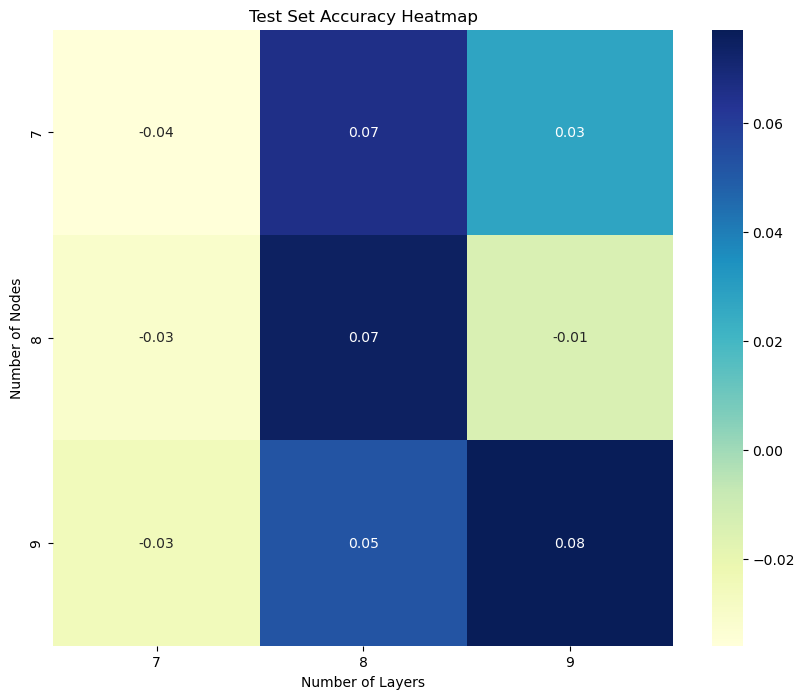

: 

In [ ]:
# make a seaborn heat map of results
# make sure it takes up 5 positional arguments
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
results_array = np.array(results)
heatmap_data = results_array[:,2:].reshape(3,3,2)  # reshape to 3x3 grid with 2 values (train and test)
sns.heatmap(heatmap_data[:,:,1], annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=range(7,10), yticklabels=range(7,10))
plt.xlabel('Number of Layers') 
plt.ylabel('Number of Nodes')
plt.title('Test Set Accuracy Heatmap')
plt.show()